# 2.7.1 Distribución t de Student

**Distribución de Student:** $\;$ pdf de **media** $\mu,\,$ **parámetro de escala** $\,\sigma>0\,$ y **grados de libertad (normalidad)** $\,\nu>0$
$$\mathcal{T}(y\mid\mu,\sigma^2,\nu)\propto\left[1+\frac{1}{\nu}\left(\frac{y-\mu}{\sigma}\right)^2\right]^{-\frac{\nu+1}{2}}$$

**Heavy tails:** $\;$ la pdf decae como una función polinómica del cuadrado de la distancia a su centro, por lo que concentra mayor probabilidad en sus colas que la Gaussiana

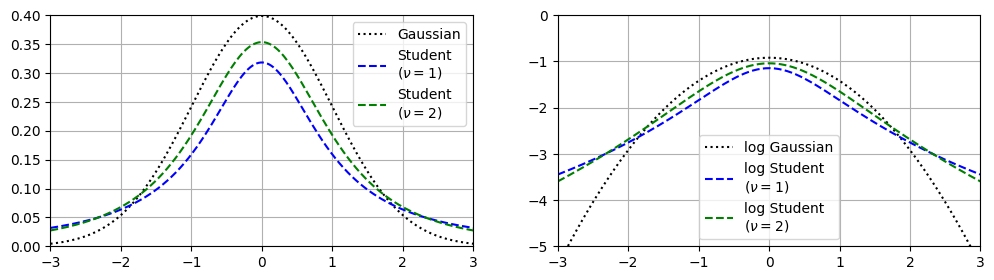

In [1]:
import numpy as np; import matplotlib.pyplot as plt; from scipy.stats import t, norm
Y = norm(0, 1); x = np.linspace(-3, 3, 200); T1 = t(df=1, loc=0, scale=1); T2 = t(df=2, loc=0, scale=1)
fig, axs = plt.subplots(1, 2, figsize=(12,3))
ax = axs[0]; ax.grid(); ax.set_xlim(-3, 3); ax.set_ylim(0, .4)
ax.plot(x, Y.pdf(x), "k:", label="Gaussian")
ax.plot(x, T1.pdf(x), "b--", label="Student\n" + r"$(\nu=1)$")
ax.plot(x, T2.pdf(x), "g--", label="Student\n" + r"$(\nu=2)$"); ax.legend()
ax = axs[1]; ax.grid(); ax.set_xlim(-3, 3); ax.set_ylim(-5, 0)
ax.plot(x, np.log(Y.pdf(x)), "k:", label="log Gaussian")
ax.plot(x, np.log(T1.pdf(x)), "b--", label="log Student\n" + r"$(\nu=1)$")
ax.plot(x, np.log(T2.pdf(x)), "g--", label="log Student\n" + r"$(\nu=2)$"); ax.legend();

**Robustez:** $\;$ sin outliers se aproxima a la Gaussiana; con outliers es más robusta

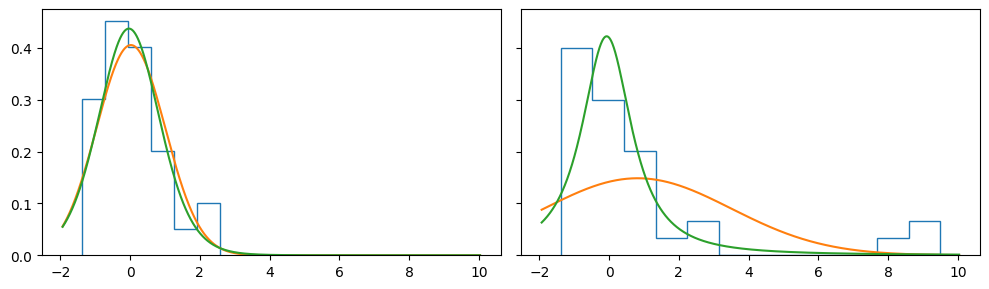

In [2]:
import numpy as np; import matplotlib.pyplot as plt; from scipy.stats import t, norm
np.random.seed(seed=233423); x = norm(0, 1).rvs(30); xo = np.concatenate([x, np.array([8, 8.75, 9.5])])
fig, axs = plt.subplots(1, 2, figsize=(10, 3), sharey=True, tight_layout=True)
axs[0].hist(x, bins='auto', density=True, histtype='step')
axs[1].hist(xo, bins='auto', density=True, histtype='step')
r = np.arange(*axs[1].get_xlim(), .01)
loc, scale = norm.fit(x);   axs[0].plot(r, norm.pdf(r, loc, scale))
fd, loc, scale = t.fit(x);  axs[0].plot(r, t.pdf(r, fd, loc, scale))
loc, scale = norm.fit(xo);  axs[1].plot(r, norm.pdf(r, loc, scale))
fd, loc, scale = t.fit(xo); axs[1].plot(r, t.pdf(r, fd, loc, scale));

**Propiedades:**
* Media solo definida si $\nu>1$: $\;\mu$
* Moda: $\;\mu$
* Varianza solo definida si $\nu>2$: $\;\dfrac{\nu\sigma^2}{\nu-2}$
* Si $\;\nu\gg 5,\;$ se aproxima mucho a la Gaussiana y pierde robustez
* Se suele utilizar $\,\nu=4$
